#regression Irisdataset

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [23]:
#Loading the dataset
df = pd.read_csv('/content/Iris.csv')


#2.EXPLORATORY DATA ANALYSIS

#Data Profiling



In [24]:
# Viewing the datasets first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:
# Display dataset summary
print("\n Dataset Summary:\n")
print(df.info())


 Dataset Summary:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


6 columns
150 rows
No null values

In [26]:
#Basic stats overview on the data
print("\n Stats Overview:")
df.describe()


 Stats Overview:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


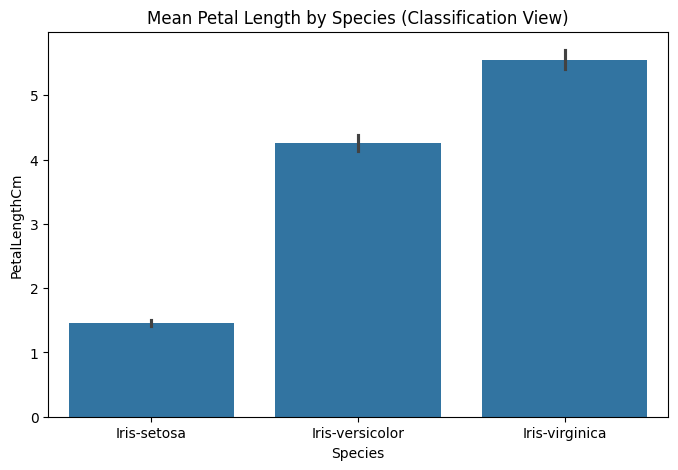

In [27]:
#Bar Plot: Mean Petal Length by Species
# =============================================
plt.figure(figsize=(8, 5))
sns.barplot(x='Species', y='PetalLengthCm', data=df, estimator=np.mean)
plt.title("Mean Petal Length by Species (Classification View)")
plt.show()

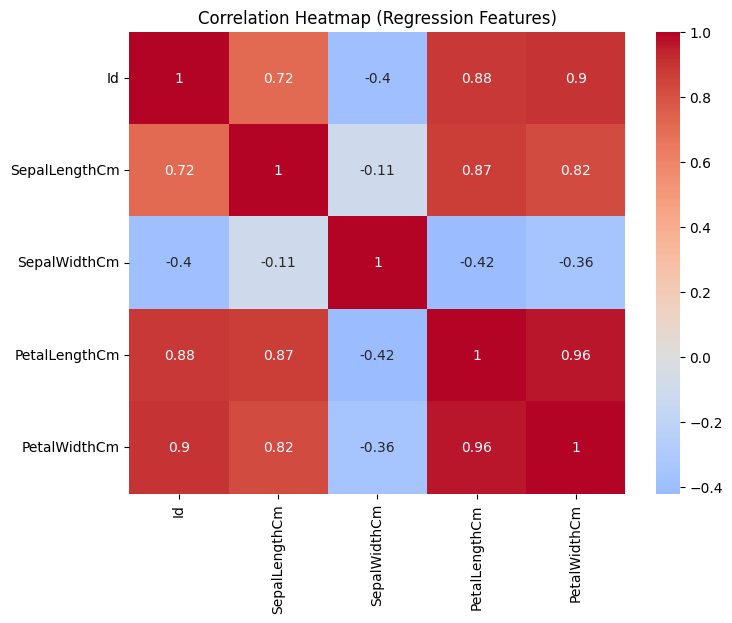

In [28]:
#Heatmap: Correlation Matrix (Regression)
# =============================================
plt.figure(figsize=(8, 6))
corr = df.drop('Species', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap (Regression Features)")
plt.show()

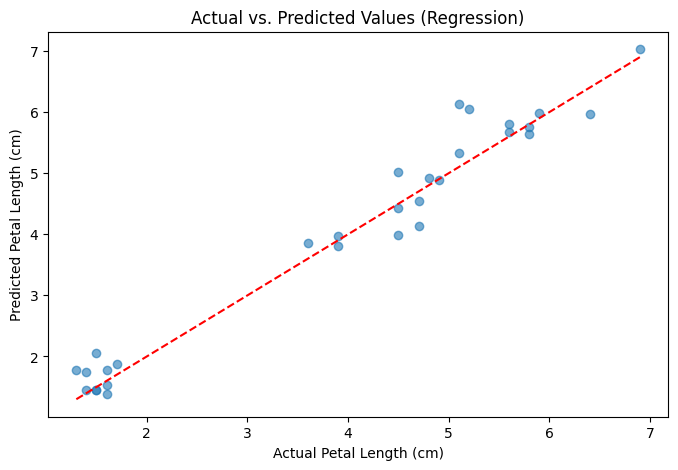

In [29]:
#Scatter Plot: Actual vs. Predicted Values

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Petal Length (cm)")
plt.ylabel("Predicted Petal Length (cm)")
plt.title("Actual vs. Predicted Values (Regression)")
plt.show()

In [30]:
# Drop Id column as it's not useful for regression
df_reg = df.drop(['Id', 'Species'], axis=1)
X = df_reg.drop('PetalLengthCm', axis=1)
y = df_reg['PetalLengthCm']

In [31]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Display the shapes
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 3)
Test set shape: (30, 3)


In [33]:
# Sample of the training data
print("\nSample training data:")
print(X_train.head())
print(y_train.head())


Sample training data:
    SepalLengthCm  SepalWidthCm  PetalWidthCm
22            4.6           3.6           0.2
15            5.7           4.4           0.4
65            6.7           3.1           1.4
11            4.8           3.4           0.2
42            4.4           3.2           0.2
22    1.0
15    1.5
65    4.4
11    1.6
42    1.3
Name: PetalLengthCm, dtype: float64


Predict Petal Width:

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Make predictions
y_pred = model.predict(X_test)

In [37]:
# Evaluate the model
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))

Mean squared error: 0.13
Coefficient of determination (R2): 0.96
